In [199]:
import gdown
import zipfile
import os

# Google Drive 공유 링크
url = "https://drive.google.com/file/d/1Gyk5STLl_ghJ81FS90NynAPOGc_ojSR0/view?usp=drive_link"

# gdown이 이해할 수 있는 ID 형식으로 변환
file_id = url.split("/d/")[1].split("/")[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# 저장할 파일 이름
output = "downloaded_file.zip"

# 구글 드라이브에서 다운로드
print("🔽 파일 다운로드 중...")
gdown.download(download_url, output, quiet=False)

# 압축 해제 (zip 파일일 경우)
extract_dir = "extracted_files"
os.makedirs(extract_dir, exist_ok=True)

print("📦 압축 해제 중...")
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✅ 압축 해제 완료! 경로: {os.path.abspath(extract_dir)}")

🔽 파일 다운로드 중...


Downloading...
From: https://drive.google.com/uc?id=1Gyk5STLl_ghJ81FS90NynAPOGc_ojSR0
To: c:\SKN20\pandas-data-analysis\part7\downloaded_file.zip
100%|██████████| 16.8M/16.8M [00:03<00:00, 4.35MB/s]


📦 압축 해제 중...
✅ 압축 해제 완료! 경로: c:\SKN20\pandas-data-analysis\part7\extracted_files


In [200]:
import pandas as pd
import numpy as np
train = pd.read_csv('./extracted_files/open/train.csv')
# 정수형 변환 함수
import re
def extract_and_convert_to_int(data):
    numbers = re.findall(r'\d+', str(data))
    return int(numbers[0]) if numbers else np.nan

train['가해운전자 연령'] = train['가해운전자 연령'].apply(extract_and_convert_to_int)
train['피해운전자 연령'] = train['피해운전자 연령'].apply(extract_and_convert_to_int)
train

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70.0,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61.0,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38.0,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36.0,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52.0,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,28.0,경상,0,0,1,0,3
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,52.0,경상,0,0,1,0,3
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,중상,승용,남,73.0,중상,0,2,0,0,10
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,57.0,경상,0,0,1,0,3


In [201]:
# 데이터 기초 탐색 데이터의 크기, 구조, 결측치, 중복값, 기술통계량, 고유값
def  wrangling(train_set):
    print("---shape---")
    display(train_set.shape)

    print("\n---info---")
    display(train_set.info())

    print("\n---nan---")
    display(train_set.isna().sum())

    print("\n---duplicated---")
    display(train_set[train_set.duplicated()])

    print("\n---describe---")
    display(train_set.describe())

    print("\n---unique---")
    display(train_set.nunique())

wrangling(train)

---shape---


(39609, 23)


---info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           39609 non-null  object 
 1   사고일시         39609 non-null  object 
 2   요일           39609 non-null  object 
 3   기상상태         39609 non-null  object 
 4   시군구          39609 non-null  object 
 5   도로형태         39609 non-null  object 
 6   노면상태         39609 non-null  object 
 7   사고유형         39609 non-null  object 
 8   사고유형 - 세부분류  39609 non-null  object 
 9   법규위반         39609 non-null  object 
 10  가해운전자 차종     39609 non-null  object 
 11  가해운전자 성별     39609 non-null  object 
 12  가해운전자 연령     38615 non-null  float64
 13  가해운전자 상해정도   39609 non-null  object 
 14  피해운전자 차종     38618 non-null  object 
 15  피해운전자 성별     38618 non-null  object 
 16  피해운전자 연령     38549 non-null  float64
 17  피해운전자 상해정도   38618 non-null  object 
 18  사망자수         39609 non-null  int64

None


---nan---


ID                0
사고일시              0
요일                0
기상상태              0
시군구               0
도로형태              0
노면상태              0
사고유형              0
사고유형 - 세부분류       0
법규위반              0
가해운전자 차종          0
가해운전자 성별          0
가해운전자 연령        994
가해운전자 상해정도        0
피해운전자 차종        991
피해운전자 성별        991
피해운전자 연령       1060
피해운전자 상해정도      991
사망자수              0
중상자수              0
경상자수              0
부상자수              0
ECLO              0
dtype: int64


---duplicated---


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO



---describe---


,가해운전자 연령,피해운전자 연령,사망자수,중상자수,경상자수,부상자수,ECLO
count,38615.000000,38549.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,47.906176,44.699655,0.007776,0.262365,1.070085,0.126865,4.726704
std,16.060277,16.968567,0.090109,0.500845,0.992034,0.394670,3.207206
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,31.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,50.000000,45.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,60.000000,58.000000,0.000000,0.000000,1.000000,0.000000,6.000000
max,98.000000,98.000000,2.000000,6.000000,22.000000,10.000000,74.000000



---unique---


ID             39609
사고일시           18057
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          87
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          95
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

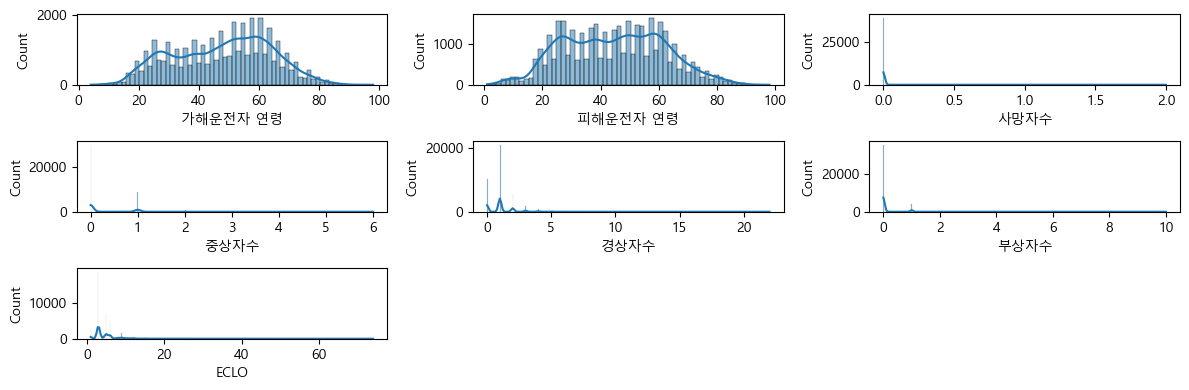

In [202]:
# 수치적 특성
# 문자열 데이터가 아닌 칼럼만 모인 리스트 num_cols를 이용해서 각 컬럼별 분포를 확인
import matplotlib.pyplot as plt
import seaborn as sns
# 한글화
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

num_cols  = train.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(12, 4))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(train[col], kde=True)
plt.tight_layout()

In [203]:
# 범주형 데이터 확인
# cat_cols = train.select_dtypes(include='object').columns
# plt.figure(figsize=(12, 8))

# for i, col in enumerate(cat_cols):
#     plt.subplot(7, 3, i + 1)
#     sns.barplot(data=train, x=col, y='ECLO')

# plt.tight_layout()

In [204]:
# 사고지역 (시 군구) 와 인명피해 심각도 ELCO 관계탐색
# 구별 상위10 동별 상위10  nlargest(10)
train['구'] = train['시군구'].str.split(" ",expand=True)[1]
train['동'] = train['시군구'].str.split(" ",expand=True)[2]

display(train.groupby(['구'])['ECLO'].mean().nlargest(10))
display(train.groupby(['동'])['ECLO'].mean().nlargest(10))


구
달성군    5.072280
동구     4.889534
서구     4.775680
수성구    4.727300
북구     4.687669
남구     4.623681
달서구    4.618441
중구     4.541610
Name: ECLO, dtype: float64

동
노곡동    10.333333
덕곡동     9.875000
대안동     9.333333
내동      8.400000
하서동     8.000000
진인동     7.823529
둔산동     7.571429
조야동     7.120000
송정동     7.071429
도남동     7.000000
Name: ECLO, dtype: float64

C:\Users\31799\AppData\Local\Temp\ipykernel_16912\1427366675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='가해운전자 연령', y='법규위반', palette="Set3")


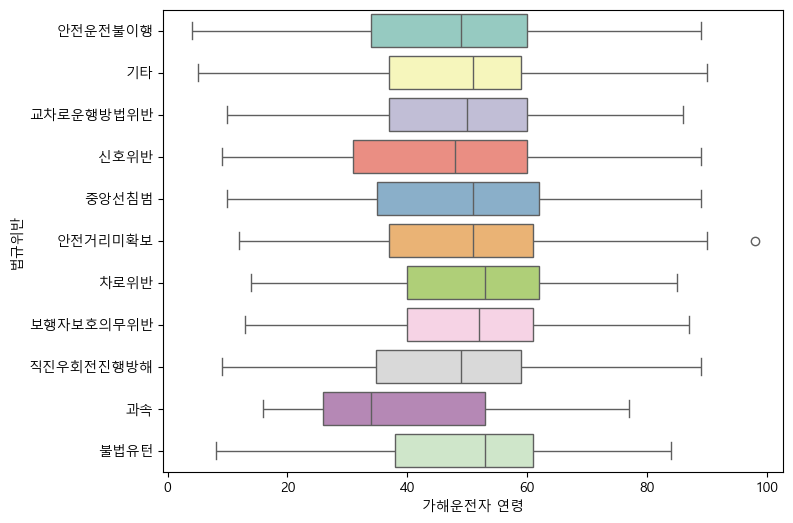

In [205]:
# 가해 운전자의 연령과 법규 위반과의 관계  boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x='가해운전자 연령', y='법규위반', palette="Set3")
plt.show()

C:\Users\31799\AppData\Local\Temp\ipykernel_16912\2940799008.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x='가해운전자 연령', y='ECLO', palette='viridis', alpha=0.7, label='가해운전자 연령')


C:\Users\31799\AppData\Local\Temp\ipykernel_16912\2940799008.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x='피해운전자 연령', y='ECLO', palette='viridis', alpha=0.7, label='피해운전자 연령')


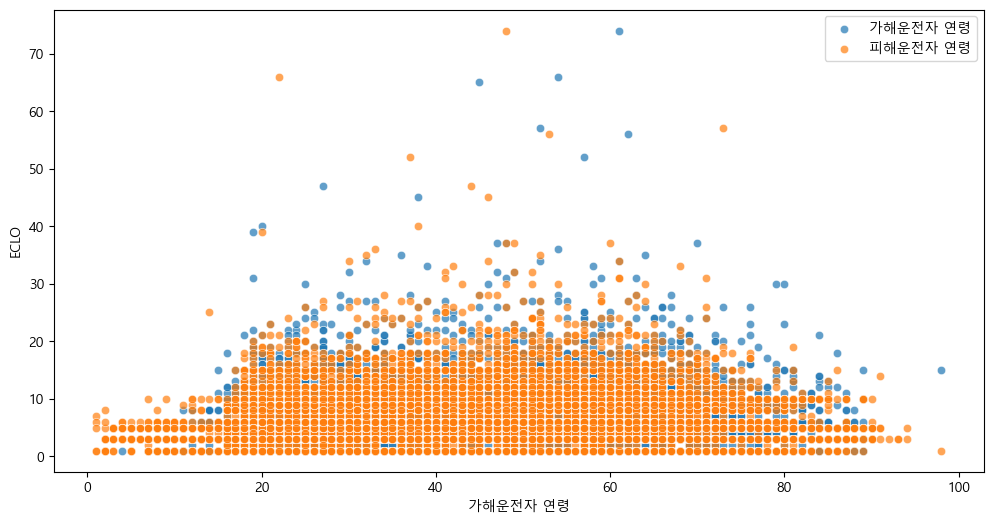

In [206]:
# 가해 운전자, 피해 운전자의 연령과  인명 피해 심각도(ECLO)의 관계 분석
# 가설 : 가해운전자 또는 피해운전자의 연령이 높을수록 더 높은 ECLO 값을 가질 것이다. --> x
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train, x='가해운전자 연령', y='ECLO', palette='viridis', alpha=0.7, label='가해운전자 연령')
sns.scatterplot(data=train, x='피해운전자 연령', y='ECLO', palette='viridis', alpha=0.7, label='피해운전자 연령')

plt.show()
# 나이와 ECLO 상관관계 없음

C:\Users\31799\AppData\Local\Temp\ipykernel_16912\3504087865.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='월', y='ECLO', ci=None, palette='Blues', label='월별 ECLO')
C:\Users\31799\AppData\Local\Temp\ipykernel_16912\3504087865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='월', y='ECLO', ci=None, palette='Blues', label='월별 ECLO')
C:\Users\31799\AppData\Local\Temp\ipykernel_16912\3504087865.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='공휴일여부', y='ECLO', ci=None, palette='Reds', label='공휴일여부별 ECLO')
C:\Users\31799\AppData\Local\Temp\ipykernel_16912\3504087865.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

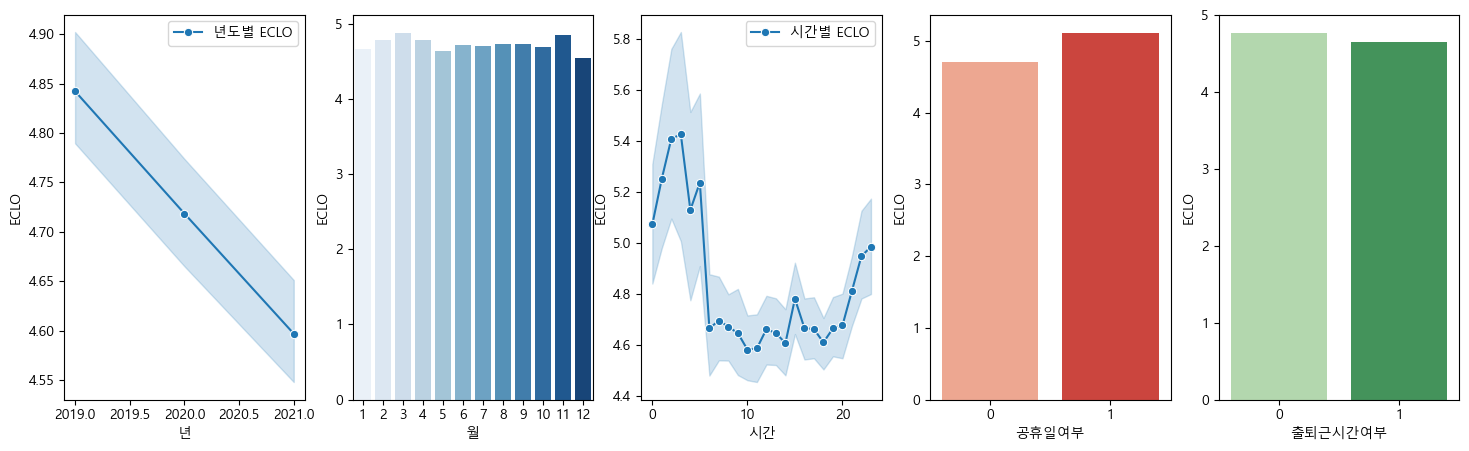

In [207]:
# 타겟변수 ECLO에 대한 연도 월 시간별 시계열 그래프 확인 분석
# 가설1 년도가 증가할수록 ECLO 낮을거 같다
# 가설2 공휴일에는 ECLO 높을거 같다
# 가설3 출퇴근 시간에 ECLO 높을거 같다

# 한국 공휴일 라이브러리
import holidays
df_holidays = holidays.KR(years=[2018, 2019, 2020, 2021, 2022, 2023])

train['사고일시'] = pd.to_datetime(train['사고일시'])

train['년'] = train['사고일시'].dt.year
train['월'] = train['사고일시'].dt.month
train['일'] = train['사고일시'].dt.day
train['시간'] = train['사고일시'].dt.hour
train['공휴일여부'] = train['사고일시'].dt.date.apply(lambda x: 1 if x in df_holidays else 0)
train['출퇴근시간여부'] = train['시간'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)
train = train.drop(columns=['사고일시'])
# 사고일시 컬럼에서 년도 월 일 시간을 분류해서 추가
# 년도 line
# 월 bar
# 시간 line
plt.figure(figsize=(18, 5))
plt.subplot(1, 5, 1)
sns.lineplot(data=train, x='년', y='ECLO', marker='o', label='년도별 ECLO')
plt.subplot(1, 5, 2)
sns.barplot(data=train, x='월', y='ECLO', ci=None, palette='Blues', label='월별 ECLO')
plt.subplot(1, 5, 3)
sns.lineplot(data=train, x='시간', y='ECLO', marker='o', label='시간별 ECLO')
plt.subplot(1,5,4)
sns.barplot(data=train, x='공휴일여부', y='ECLO', ci=None, palette='Reds', label='공휴일여부별 ECLO')
plt.subplot(1,5,5)
sns.barplot(data=train, x='출퇴근시간여부', y='ECLO', ci=None, palette='Greens', label='출퇴근시간여부별 ECLO')

plt.show()

Text(0.5, 1.0, '상관관계 히트맵')

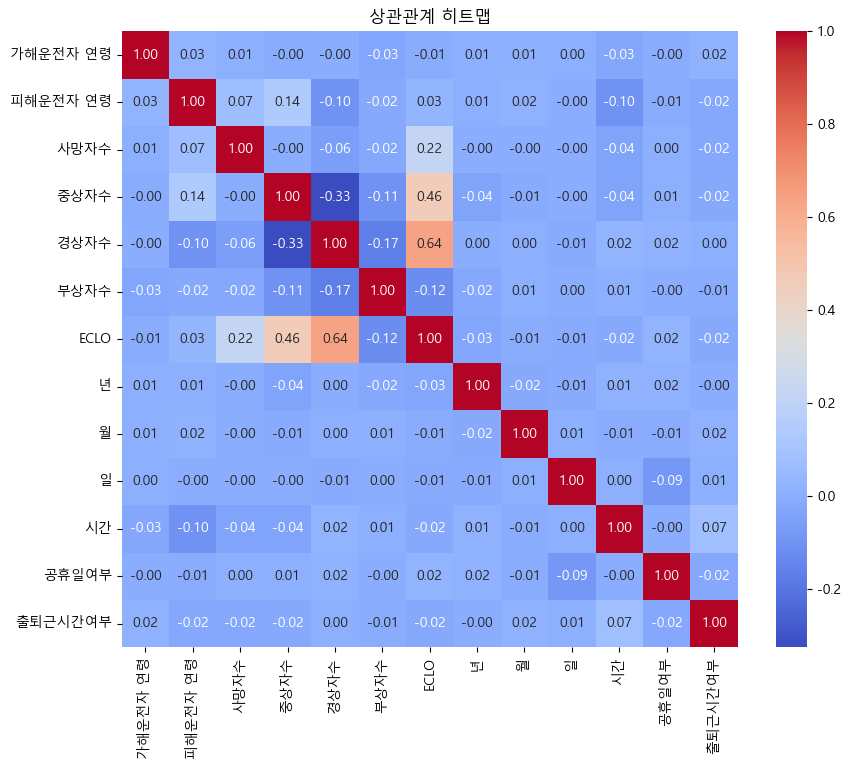

In [208]:
# 상관관계 히트맵
plt.figure(figsize=(10, 8))
# 수치형 데이터만
corr_matrix = train[train.select_dtypes(exclude='object').columns].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("상관관계 히트맵")

데이터 전처리 및 피쳐 엔지니어링

In [209]:
test = pd.read_csv('./extracted_files/open/test.csv')
# 년 월 일 시간 추출
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'
test[['년', '월', '일', '시간']] = test['사고일시'].str.extract(time_pattern).apply(pd.to_numeric)
test_df = test.drop(columns=['사고일시'])
test_df

,ID,요일,기상상태,시군구,도로형태,노면상태,사고유형,년,월,일,시간
0,ACCIDENT_39609,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람,2022,1,1,1
1,ACCIDENT_39610,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람,2022,1,1,1
2,ACCIDENT_39611,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차,2022,1,1,4
3,ACCIDENT_39612,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차,2022,1,1,4
4,ACCIDENT_39613,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차,2022,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차,2022,12,31,18
10959,ACCIDENT_50568,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차,2022,12,31,18
10960,ACCIDENT_50569,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차,2022,12,31,20
10961,ACCIDENT_50570,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차,2022,12,31,20


In [210]:
# 위치 특성 추출 : ECLO가 높은 시군구가 있다는 것을 확인
local_pattern = r'(\S+ )(\S+ )(\S+)'
test_df[['도시', '구', '동']] = test_df['시군구'].str.extract(local_pattern)
test_df = test_df.drop(columns=['시군구'])
train[['도시', '구', '동']] = train['시군구'].str.extract(local_pattern)
train_df = train.drop(columns=['시군구'])
train_df

,ID,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,...,ECLO,구,동,년,월,일,시간,공휴일여부,출퇴근시간여부,도시
0,ACCIDENT_00000,화요일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,...,5,중구,대신동,2019,1,1,0,1,0,대구광역시
1,ACCIDENT_00001,화요일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,...,3,달서구,감삼동,2019,1,1,0,1,0,대구광역시
2,ACCIDENT_00002,화요일,맑음,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,...,3,수성구,두산동,2019,1,1,1,1,0,대구광역시
3,ACCIDENT_00003,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,...,5,북구,복현동,2019,1,1,2,1,0,대구광역시
4,ACCIDENT_00004,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,...,3,동구,신암동,2019,1,1,4,1,0,대구광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,여,...,3,수성구,수성동3가,2021,12,31,19,0,1,대구광역시
39605,ACCIDENT_39605,금요일,맑음,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,여,...,3,달서구,상인동,2021,12,31,19,0,1,대구광역시
39606,ACCIDENT_39606,금요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,남,...,10,달서구,월성동,2021,12,31,21,0,0,대구광역시
39607,ACCIDENT_39607,금요일,맑음,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,...,3,달서구,장동,2021,12,31,22,0,0,대구광역시


In [211]:
road_pattern = r'(.+) - (.+)'
test_df[['도로형태1', '도로형태2']] = test_df['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])
test_df

,ID,요일,기상상태,노면상태,사고유형,년,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타
2,ACCIDENT_39611,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안
3,ACCIDENT_39612,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타
4,ACCIDENT_39613,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,토요일,맑음,건조,차대차,2022,12,31,18,대구광역시,남구,대명동,단일로,터널
10959,ACCIDENT_50568,토요일,맑음,건조,차대차,2022,12,31,18,대구광역시,수성구,시지동,단일로,기타
10960,ACCIDENT_50569,토요일,맑음,건조,차대차,2022,12,31,20,대구광역시,수성구,연호동,단일로,기타
10961,ACCIDENT_50570,토요일,맑음,건조,차대차,2022,12,31,20,대구광역시,수성구,범물동,교차로,교차로부근


In [212]:
pattern = r'\d+'
import  re
train['가해운전자 연령'] = train['가해운전자 연령'].apply(lambda x: int(re.findall(pattern, str(x))[0]) if re.findall(pattern, str(x)) else np.nan)
train['피해운전자 연령'] = train['피해운전자 연령'].apply(lambda x: int(re.findall(pattern, str(x))[0]) if re.findall(pattern, str(x)) else np.nan)

In [213]:
# 지역별 평균 연령 추출 및 데이터 병합
# 가해운전자 연령과 피해운전자 연령의 평균을 지역별로 계산 -> 원본 데이터와 병합
age_mean = train_df[['도시', '구', '동', '가해운전자 연령', '피해운전자 연령']].groupby(['도시', '구', '동']).mean()
age_mean.columns = ['가해운전자_평균연령', '피해운전자_평균연령']
train_df = pd.merge(train_df, age_mean, on=['도시', '구', '동'], how='left')
test_df = pd.merge(test_df, age_mean, on=['도시', '구', '동'], how='left')

In [214]:
# 성별 남1 여0
train_df['가해운전자 성별'] = train_df['가해운전자 성별'].map({'남': 1, '여': 0})
train_df['피해운전자 성별'] = train_df['피해운전자 성별'].map({'남': 1, '여': 0})



In [215]:
# 지역별 평균 성별
gender_mean = train_df[['도시', '구', '동', '가해운전자 성별', '피해운전자 성별']].groupby(['도시', '구', '동']).mean()
gender_mean.columns = ['가해운전자_평균성별', '피해운전자_평균성별']
train_df = pd.merge(train_df, gender_mean, on=['도시', '구', '동'], how='left')
test_df = pd.merge(test_df, gender_mean, on=['도시', '구', '동'], how='left')

In [219]:
# 주말 특성 토,일 1 나머지 0
train_df['주말 여부'] = train_df['요일'].apply(lambda x : 1 if x in ['토요일', '일요일'] else 0)
test_df['주말 여부'] = test_df['요일'].apply(lambda x : 1 if x in ['토요일', '일요일'] else 0)
test_df

,ID,요일,기상상태,노면상태,사고유형,년,월,일,시간,도시,구,동,도로형태1,도로형태2,가해운전자_평균연령,피해운전자_평균연령,가해운전자_평균성별,피해운전자_평균성별,주말 여부
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안,46.719033,44.303951,0.728097,0.677812,1
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타,47.977273,46.119247,0.685950,0.658996,1
2,ACCIDENT_39611,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안,46.923077,45.321678,0.818182,0.664336,1
3,ACCIDENT_39612,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타,47.569061,43.263014,0.671271,0.654795,1
4,ACCIDENT_39613,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안,47.176383,42.906767,0.744395,0.732331,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,토요일,맑음,건조,차대차,2022,12,31,18,대구광역시,남구,대명동,단일로,터널,47.900530,44.159930,0.765156,0.731107,1
10959,ACCIDENT_50568,토요일,맑음,건조,차대차,2022,12,31,18,대구광역시,수성구,시지동,단일로,기타,49.696970,45.190184,0.739394,0.644172,1
10960,ACCIDENT_50569,토요일,맑음,건조,차대차,2022,12,31,20,대구광역시,수성구,연호동,단일로,기타,46.990654,44.563107,0.747664,0.737864,1
10961,ACCIDENT_50570,토요일,맑음,건조,차대차,2022,12,31,20,대구광역시,수성구,범물동,교차로,교차로부근,48.508475,47.314655,0.665254,0.655172,1


#### 데이터 전처리 및 피처엔지니어링 심화


In [235]:
# 지역별 사고 유형에 따른 차량 종류의 위험도 산출 및 데이터 병합
# 사고 유형과 차종별 사고 빈도는 지역별로 각기 다른 특성을 가진다 -ECLO의 주요 요인
# 파생변수 : 가해운전자 차종의 ECLO의 가해 운전자 차종 건수를 곱해 차종별 위험도 파생변수
ride_dangerous =train_df[['가해운전자 차종', 'ECLO']].groupby(['가해운전자 차종']).mean()
ride_dangerous.columns = ['가해운전자_차종_위험도']

ride_count = train_df[['도시', '구', '가해운전자 차종']]
ride_count['count'] = 1
ride_count = ride_count.groupby(['도시', '구', '가해운전자 차종']).count().reset_index()
temp1 = pd.merge(ride_count, ride_dangerous, on='가해운전자 차종', how='left')
temp1['multiply'] = temp1['count'] * temp1['가해운전자_차종_위험도']
temp1 = temp1.groupby(['도시','구']).sum().reset_index().drop(columns=['가해운전자_차종_위험도'])
temp1['가해운전자_차종_위험도'] = temp1['multiply'] / temp1['count']
temp1.drop(columns=['count', 'multiply','가해운전자 차종'], inplace=True)
temp1

test_df = pd.merge(test_df, temp1, on=['도시', '구'], how='left')
train_df = pd.merge(train_df, temp1, on=['도시', '구'], how='left')

C:\Users\31799\AppData\Local\Temp\ipykernel_16912\1416652517.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ride_count['count'] = 1


In [ ]:
# 필요없는 열을 제거
# 범주형 데이터는 원핫.... 만약 순서나 크기가 있는 범주형은 라벨 형태 그대로 유지 범주간의 차이를 학습
# 모델.... RandeomForest
# gridsearchcv 로 최적 하이퍼 파라미터 탐색 후 모델 학습 및 예측
# test_df를 예측해서 제출
